In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,cross_val_predict
from sklearn import metrics
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
#to make everything locally
cf.go_offline()


In [2]:
dta =sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [4]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',
                 dta, return_type="dataframe")


In [5]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [6]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]' : 'occ_3',
'C(occupation)[T.4.0]' : 'occ_4',
'C(occupation)[T.5.0]' : 'occ_5',
'C(occupation)[T.6.0]' : 'occ_6',
'C(occupation_husb)[T.2.0]' : 'occ_husb_2',
'C(occupation_husb)[T.3.0]' : 'occ_husb_3',
'C(occupation_husb)[T.4.0]' : 'occ_husb_4',
'C(occupation_husb)[T.5.0]' : 'occ_husb_5',
'C(occupation_husb)[T.6.0]' : 'occ_husb_6'})


In [7]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [8]:
X.drop(columns = ['Intercept'], inplace =True)

In [9]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

# Description of Dataset
- rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar",teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs
- affair: 1 if she has spend time>0 else 0



In [10]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [11]:
px.box(X, y = X.age,)

In [12]:
px.box(X, y=X['yrs_married'])

In [13]:
X.isnull().sum()

occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [14]:
len(y)

6366

# Findings:
- No missing values
- no outliers
- One hot encoding implemented
- Standardisation is required

In [15]:
import scipy.stats as stat
import pylab 
def qqplot_hist(dataframe, column):
    plt.figure(figsize =(10,5))
    plt.subplot(1,2,1)
    plt.hist(dataframe[column])
    plt.subplot(1,2,2)
    stat.probplot(dataframe[column], plot = pylab)
    

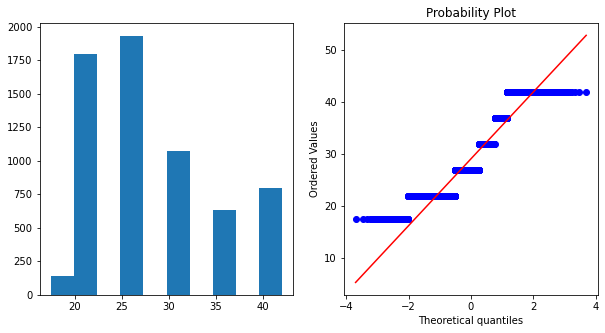

In [16]:
qqplot_hist(X, 'age')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_scaled = scaler.fit_transform(X)

In [19]:
pd.DataFrame(X_scaled, columns = X.columns)

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,2.531984,-0.881319,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,-0.394947,-0.881319,1.571974,-0.362674,-0.131987,-0.508528,3.462923,-0.684232,-0.622764,-0.301356,0.926147,0.426025,0.548190,0.420778,0.653341,1.281153
6362,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,0.426025,0.548190,-0.276884,-1.623785,0.821981
6363,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,-0.622764,-0.301356,0.926147,-1.034396,-0.894207,-0.974546,-0.485222,-0.096364
6364,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,0.426025,-0.413408,-0.276884,0.653341,-0.096364


In [20]:
# train_test_split

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y, test_size =0.15, random_state =32)

In [22]:
def precison_recall_accuracy_f1(pred,true):
    d ={}
    d['AccuracyScore'] = metrics.accuracy_score(true,pred)
    d["PrecisionScore"] = metrics.precision_score(true,pred)
    d["RecallScore"] = metrics.recall_score(true,pred)
    d["F1Score"] = metrics.f1_score(true,pred)
    return d

In [23]:
def plotgraph(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label ="Precisions")
    plt.plot(thresholds,recalls[:-1], "g--", label ="recalls")
    [...]

# LogisticRegression

In [24]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [25]:
lg_pred_train = lg.predict(X_train)
precison_recall_accuracy_f1(lg_pred_train, y_train)

{'AccuracyScore': 0.7294400295693957,
 'PrecisionScore': 0.6389452332657201,
 'RecallScore': 0.3624856156501726,
 'F1Score': 0.46255506607929514}

In [26]:
lg_pred_test = lg.predict(X_test)
precison_recall_accuracy_f1(lg_pred_test, y_test)

{'AccuracyScore': 0.6973821989528796,
 'PrecisionScore': 0.5677083333333334,
 'RecallScore': 0.346031746031746,
 'F1Score': 0.42998027613412226}

In [27]:
metrics.confusion_matrix(y_train,lg_pred_train)

array([[3317,  356],
       [1108,  630]], dtype=int64)

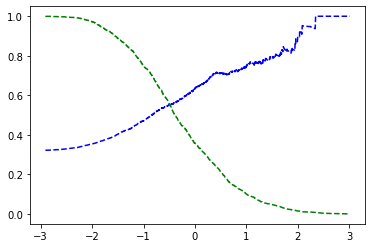

In [28]:
y_scores_lg = cross_val_predict(lg, X_train, y_train, cv =3, method ="decision_function")
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train,y_scores_lg)
plotgraph(precisions, recalls, thresholds)

# LogisticRegression Liblinear solver with l1 penalty

In [29]:
lg_liblinear = LogisticRegression(penalty='l1', solver = 'liblinear')
lg_liblinear.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [30]:
lg_liblinear_train = lg_liblinear.predict(X_train)
precison_recall_accuracy_f1(lg_liblinear_train, y_train)

{'AccuracyScore': 0.7301792644612826,
 'PrecisionScore': 0.6415478615071283,
 'RecallScore': 0.3624856156501726,
 'F1Score': 0.463235294117647}

In [31]:
lg_liblinear_test = lg_liblinear.predict(X_test)
precison_recall_accuracy_f1(lg_liblinear_test, y_test)

{'AccuracyScore': 0.6973821989528796,
 'PrecisionScore': 0.5677083333333334,
 'RecallScore': 0.346031746031746,
 'F1Score': 0.42998027613412226}

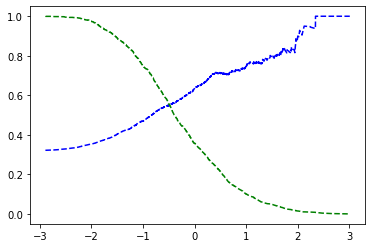

In [32]:
y_scores_liblinear = cross_val_predict(lg_liblinear, X_train, y_train, cv =3, method ="decision_function")
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train,y_scores_liblinear)
plotgraph(precisions, recalls, thresholds)

# LogisticRegression Liblinear solver with l2 penalty

In [33]:
lg_liblinearl2 = LogisticRegression(penalty='l2', solver = 'liblinear')
lg_liblinearl2.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
lg_liblinear_trainl2 = lg_liblinearl2.predict(X_train)
precison_recall_accuracy_f1(lg_liblinear_trainl2, y_train)

{'AccuracyScore': 0.7294400295693957,
 'PrecisionScore': 0.6389452332657201,
 'RecallScore': 0.3624856156501726,
 'F1Score': 0.46255506607929514}

In [35]:
lg_liblinear_testl2 = lg_liblinearl2.predict(X_test)
precison_recall_accuracy_f1(lg_liblinear_testl2, y_test)

{'AccuracyScore': 0.6973821989528796,
 'PrecisionScore': 0.5677083333333334,
 'RecallScore': 0.346031746031746,
 'F1Score': 0.42998027613412226}

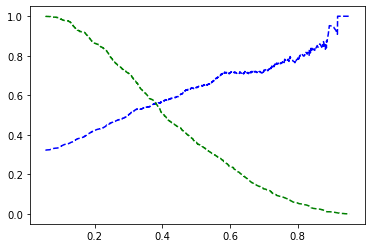

In [69]:
y_scores_liblinearl2 = cross_val_predict(lg_liblinearl2, X_train, y_train, cv =3, method ="decision_function")
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train,lg_liblinearl2.predict_proba(X_train)[:, 1])
plotgraph(precisions, recalls, thresholds)


- WE need to build a model with good precison as we are interested in knowing accuracy of positively prected values. This model will predict if women has affair, we can ignore many women with affair(actual positives) but keeps only women with affair, we cant take chances of including women with no affair. 

In [74]:
threshold_90 =thresholds[np.argmax(precisions>=.90)]

In [75]:
y_train_90 = y_scores_liblinearl2 > threshold_90
y_train_90

array([False, False, False, ..., False, False, False])

In [76]:
precison_recall_accuracy_f1(y_train_90, y_train)

{'AccuracyScore': 0.7035668083533543,
 'PrecisionScore': 0.7294520547945206,
 'RecallScore': 0.12255466052934408,
 'F1Score': 0.2098522167487685}

In [77]:
class LogisticRegressionwithThreshold(LogisticRegression):
    def __init__(self,penalty,solver):
        super(LogisticRegressionwithThreshold,self).__init__()
        self.penalty =penalty
        self.solver =solver
        
    def predict(self, X, threshold =None):
        if threshold==None:
            return LogisticRegression.predict(self,X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            return y_pred_with_threshold
        

In [79]:
lg_final = LogisticRegressionwithThreshold('l2','liblinear')
lg_final.fit(X_train,y_train)
y_pred = lg_final.predict(X_train, threshold_90)

In [81]:
precison_recall_accuracy_f1(y_pred, y_train)

{'AccuracyScore': 0.6821289964886342,
 'PrecisionScore': 0.9090909090909091,
 'RecallScore': 0.011507479861910242,
 'F1Score': 0.02272727272727273}

In [83]:
y_pred_test = lg_final.predict(X_test, threshold_90)
precison_recall_accuracy_f1(y_pred_test, y_test)

{'AccuracyScore': 0.6701570680628273,
 'PrecisionScore': 0.5,
 'RecallScore': 0.0031746031746031746,
 'F1Score': 0.006309148264984227}

In [90]:
threshold_85 =thresholds[np.argmax(precisions>=.850)]
print(threshold_85)
y_pred_85 = lg_final.predict(X_train, threshold_85)
precison_recall_accuracy_f1(y_pred_85, y_train)

0.8577829621936014


{'AccuracyScore': 0.6858251709480687,
 'PrecisionScore': 0.8518518518518519,
 'RecallScore': 0.026467203682393557,
 'F1Score': 0.05133928571428571}

In [89]:
y_pred_test_85 = lg_final.predict(X_test, threshold_85)
precison_recall_accuracy_f1(y_pred_test_85, y_test)

{'AccuracyScore': 0.6743455497382199,
 'PrecisionScore': 0.75,
 'RecallScore': 0.01904761904761905,
 'F1Score': 0.03715170278637771}

In [91]:
# it seems like model works good with 85percent precision howsoever recall is extreamely low. 
class LogisticRegressionwithThreshold(LogisticRegression):
    def __init__(self,penalty,solver):
        super(LogisticRegressionwithThreshold,self).__init__()
        self.penalty =penalty
        self.solver =solver
        
    def predict(self, X, threshold =None):
        if threshold==None:
            return LogisticRegression.predict(self,X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= 0.8577829621936014).astype(int)
            return y_pred_with_threshold

In [92]:
lg_final = LogisticRegressionwithThreshold('l2','liblinear')
lg_final.fit(X_train,y_train)

LogisticRegressionwithThreshold(penalty='l2', solver='liblinear')

In [94]:
import pickle
pickle.dump(lg_final, open('affair_predict.pickle', 'wb'))

In [95]:
model = pickle.load(open('affair_predict.pickle', 'rb'))

In [105]:
model.predict([X_test[102]])

array([1.])

In [106]:
X_test[102],y_test[102]

(array([-0.3949472 ,  1.13466276, -0.63614294, -0.36267364, -0.1319867 ,
        -0.50852752,  3.46292315, -0.684232  , -0.62276415, -0.30135631,
        -1.15425213,  1.88644501,  1.92190156,  1.11844056, -0.48522185,
        -0.09636416]),
 1.0)